In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as pg

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# content:

## 0- Acquiring Data
## 1- Clean Data
- take a look on the missing values
- handeling missing values
- 
- changing columns names
## 2- Exploratory Analysis
## 3- Diagnostics Analysis
## 4- Predict

## ***Acquiring Data***

#### This data was collected from [Kagel](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=download) website 

In [89]:
df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')
df.columns = df.columns.str.lower()
print('the shape of the data is: ',df.shape,'\n')
df.head()

the shape of the data is:  (2823, 25) 



,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## ***Cleaning Data***

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      302 non-null    object 


In [91]:
na = df.isna().sum()
print('The Number of NaN in each col: \n\n', na[na != 0])
print()
na = df.isna().sum() / df.shape[0] * 100
print('The percentage of NaN in each col: \n\n', na[na != 0])

The Number of NaN in each col: 

 addressline2    2521
state           1486
postalcode        76
territory       1074
dtype: int64

The percentage of NaN in each col: 

 addressline2    89.302161
state           52.639036
postalcode       2.692171
territory       38.044633
dtype: float64


<AxesSubplot:>

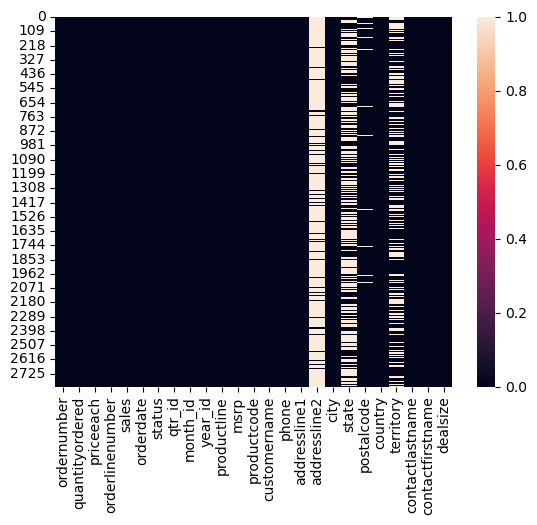

In [92]:
sns.heatmap(df.isna())

In [93]:
df.territory.unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

- APAC: Asia-Pacific - and japan
- EMEA: Europe, the Middle East and Africa.
- US-CA: United States and Canada

In [97]:
df.postalcode = df.postalcode.fillna('missing')
df.territory = df.territory.fillna('US-CA')
df.state = df.state.fillna('without')
df.addressline2 = df.addressline2.fillna('without')

In [98]:
# chanching the japan territory to APAC

ali = {'EMEA':'EMEA',
       'US-CA':'US-CA',
       'APAC':'APAC',
       'Japan':'APAC'}
df.territory = df.territory.map(ali)

In [99]:
df.territory.value_counts()

EMEA     1407
US-CA    1074
APAC      342
Name: territory, dtype: int64

In [ ]:
df.columns

In [105]:
df.columns = ['order number', 'quantity ordered', 'price each', 'order line number',
       'sales', 'order date', 'status', 'qtr_id', 'month_id', 'year_id',
       'product line', 'msrp', 'product code', 'customer name', 'phone',
       'address line1', 'address line2', 'city', 'state', 'postal code',
       'country', 'territory', 'contact last name', 'contact first name',
       'deal size']

In [110]:
df.head(1)

,order number,quantity ordered,price each,order line number,sales,order date,status,qtr_id,month_id,year_id,product line,msrp,product code,customer name,phone,address line1,address line2,city,state,postal code,country,territory,contact last name,contact first name,deal size
0,10107,30,95.7,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,without,NYC,NY,10022,USA,US-CA,Yu,Kwai,Small


## ***Exploratory Analysis***

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order number        2823 non-null   int64  
 1   quantity ordered    2823 non-null   int64  
 2   price each          2823 non-null   float64
 3   order line number   2823 non-null   int64  
 4   sales               2823 non-null   float64
 5   order date          2823 non-null   object 
 6   status              2823 non-null   object 
 7   qtr_id              2823 non-null   int64  
 8   month_id            2823 non-null   int64  
 9   year_id             2823 non-null   int64  
 10  product line        2823 non-null   object 
 11  msrp                2823 non-null   int64  
 12  product code        2823 non-null   object 
 13  customer name       2823 non-null   object 
 14  phone               2823 non-null   object 
 15  address line1       2823 non-null   object 
 16  addres

In [115]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
order number,2823.000000,10258.725115,92.085478,10100.000000,10180.000000,10262.000000,10333.500000,10425.000000
quantity ordered,2823.000000,35.092809,9.741443,6.000000,27.000000,35.000000,43.000000,97.000000
price each,2823.000000,83.658544,20.174277,26.880000,68.860000,95.700000,100.000000,100.000000
order line number,2823.000000,6.466171,4.225841,1.000000,3.000000,6.000000,9.000000,18.000000
sales,2823.000000,3553.889072,1841.865106,482.130000,2203.430000,3184.800000,4508.000000,14082.800000
qtr_id,2823.000000,2.717676,1.203878,1.000000,2.000000,3.000000,4.000000,4.000000
month_id,2823.000000,7.092455,3.656633,1.000000,4.000000,8.000000,11.000000,12.000000
year_id,2823.000000,2003.815090,0.699670,2003.000000,2003.000000,2004.000000,2004.000000,2005.000000
msrp,2823.000000,100.715551,40.187912,33.000000,68.000000,99.000000,124.000000,214.000000


In [120]:
print('-'*100)

----------------------------------------------------------------------------------------------------
